# Employee-Absenteesim-Case-Study

### Aim: To Predict the predominant reason for absenteeism from work

### Problem

- From a business perspective, employees who are not present to do their jobs, will cost more than they should. 

- The absence is a big problem because it reduces output and is annoying because it requires rescheduling and changing programs which is one of the contributing factors to the failure of a department's organization to meet performance targets.

### Objective

- Based on these problems, this analysis is carried out to predict the predominant reason for employees absenteeism from work. 

- To get answers to these problems, an analysis is carried out using supervised machine learning: Logistic regression.

### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Load DataSet

In [2]:
data = pd.read_csv('Absenteeism_data.csv')

In [3]:
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Make a Raw Backup-copy before analysis

In [4]:
df = data.copy()

In [5]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Checking the datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


### Cleaning the dataset
- Removing the 'ID' column, which exists merely to differentiate persons from one another and contains no numerical information. 
- This 'ID' cannot assist us in describing the value of absenteeism time.

In [7]:
df = df.drop(['ID'], axis =1 )

In [8]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Exploring the dataset for absence pattern based off on reason

In [9]:
df['Reason for Absence'].min()

0

In [10]:
df['Reason for Absence'].max()

28

In [11]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [12]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

## Exploratory Data Analysis

In [13]:
df.describe()

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [14]:
pd.DataFrame(df.columns.values)

,0
0,Reason for Absence
1,Date
2,Transportation Expense
3,Distance to Work
4,Age
5,Daily Work Load Average
6,Body Mass Index
7,Education
8,Children
9,Pets


### Separating numeric coloums into <code>numeric_data</code>

In [15]:
numeric_data = df.select_dtypes(exclude = object).columns
numeric_list = numeric_data.drop(['Reason for Absence', 'Education'])
pd.DataFrame(numeric_list)

,0
0,Transportation Expense
1,Distance to Work
2,Age
3,Daily Work Load Average
4,Body Mass Index
5,Children
6,Pets
7,Absenteeism Time in Hours


### Different plots for analysis (Histogram)

/tmp/ipykernel_12481/2274159595.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  curr_plot1 = sns.kdeplot(df[i],shade=True, linewidth=4.2) #curr_plot1 is taken as a variable to gain fine control over font size of graphs shown in below lines
/tmp/ipykernel_12481/2274159595.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  curr_plot1 = sns.kdeplot(df[i],shade=True, linewidth=4.2) #curr_plot1 is taken as a variable to gain fine control over font size of graphs shown in below lines
/tmp/ipykernel_12481/2274159595.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  curr_plot1 = sns.kdeplot(df[i],shade=True, linewidth=4.2) #curr_plot1 is taken as a variable

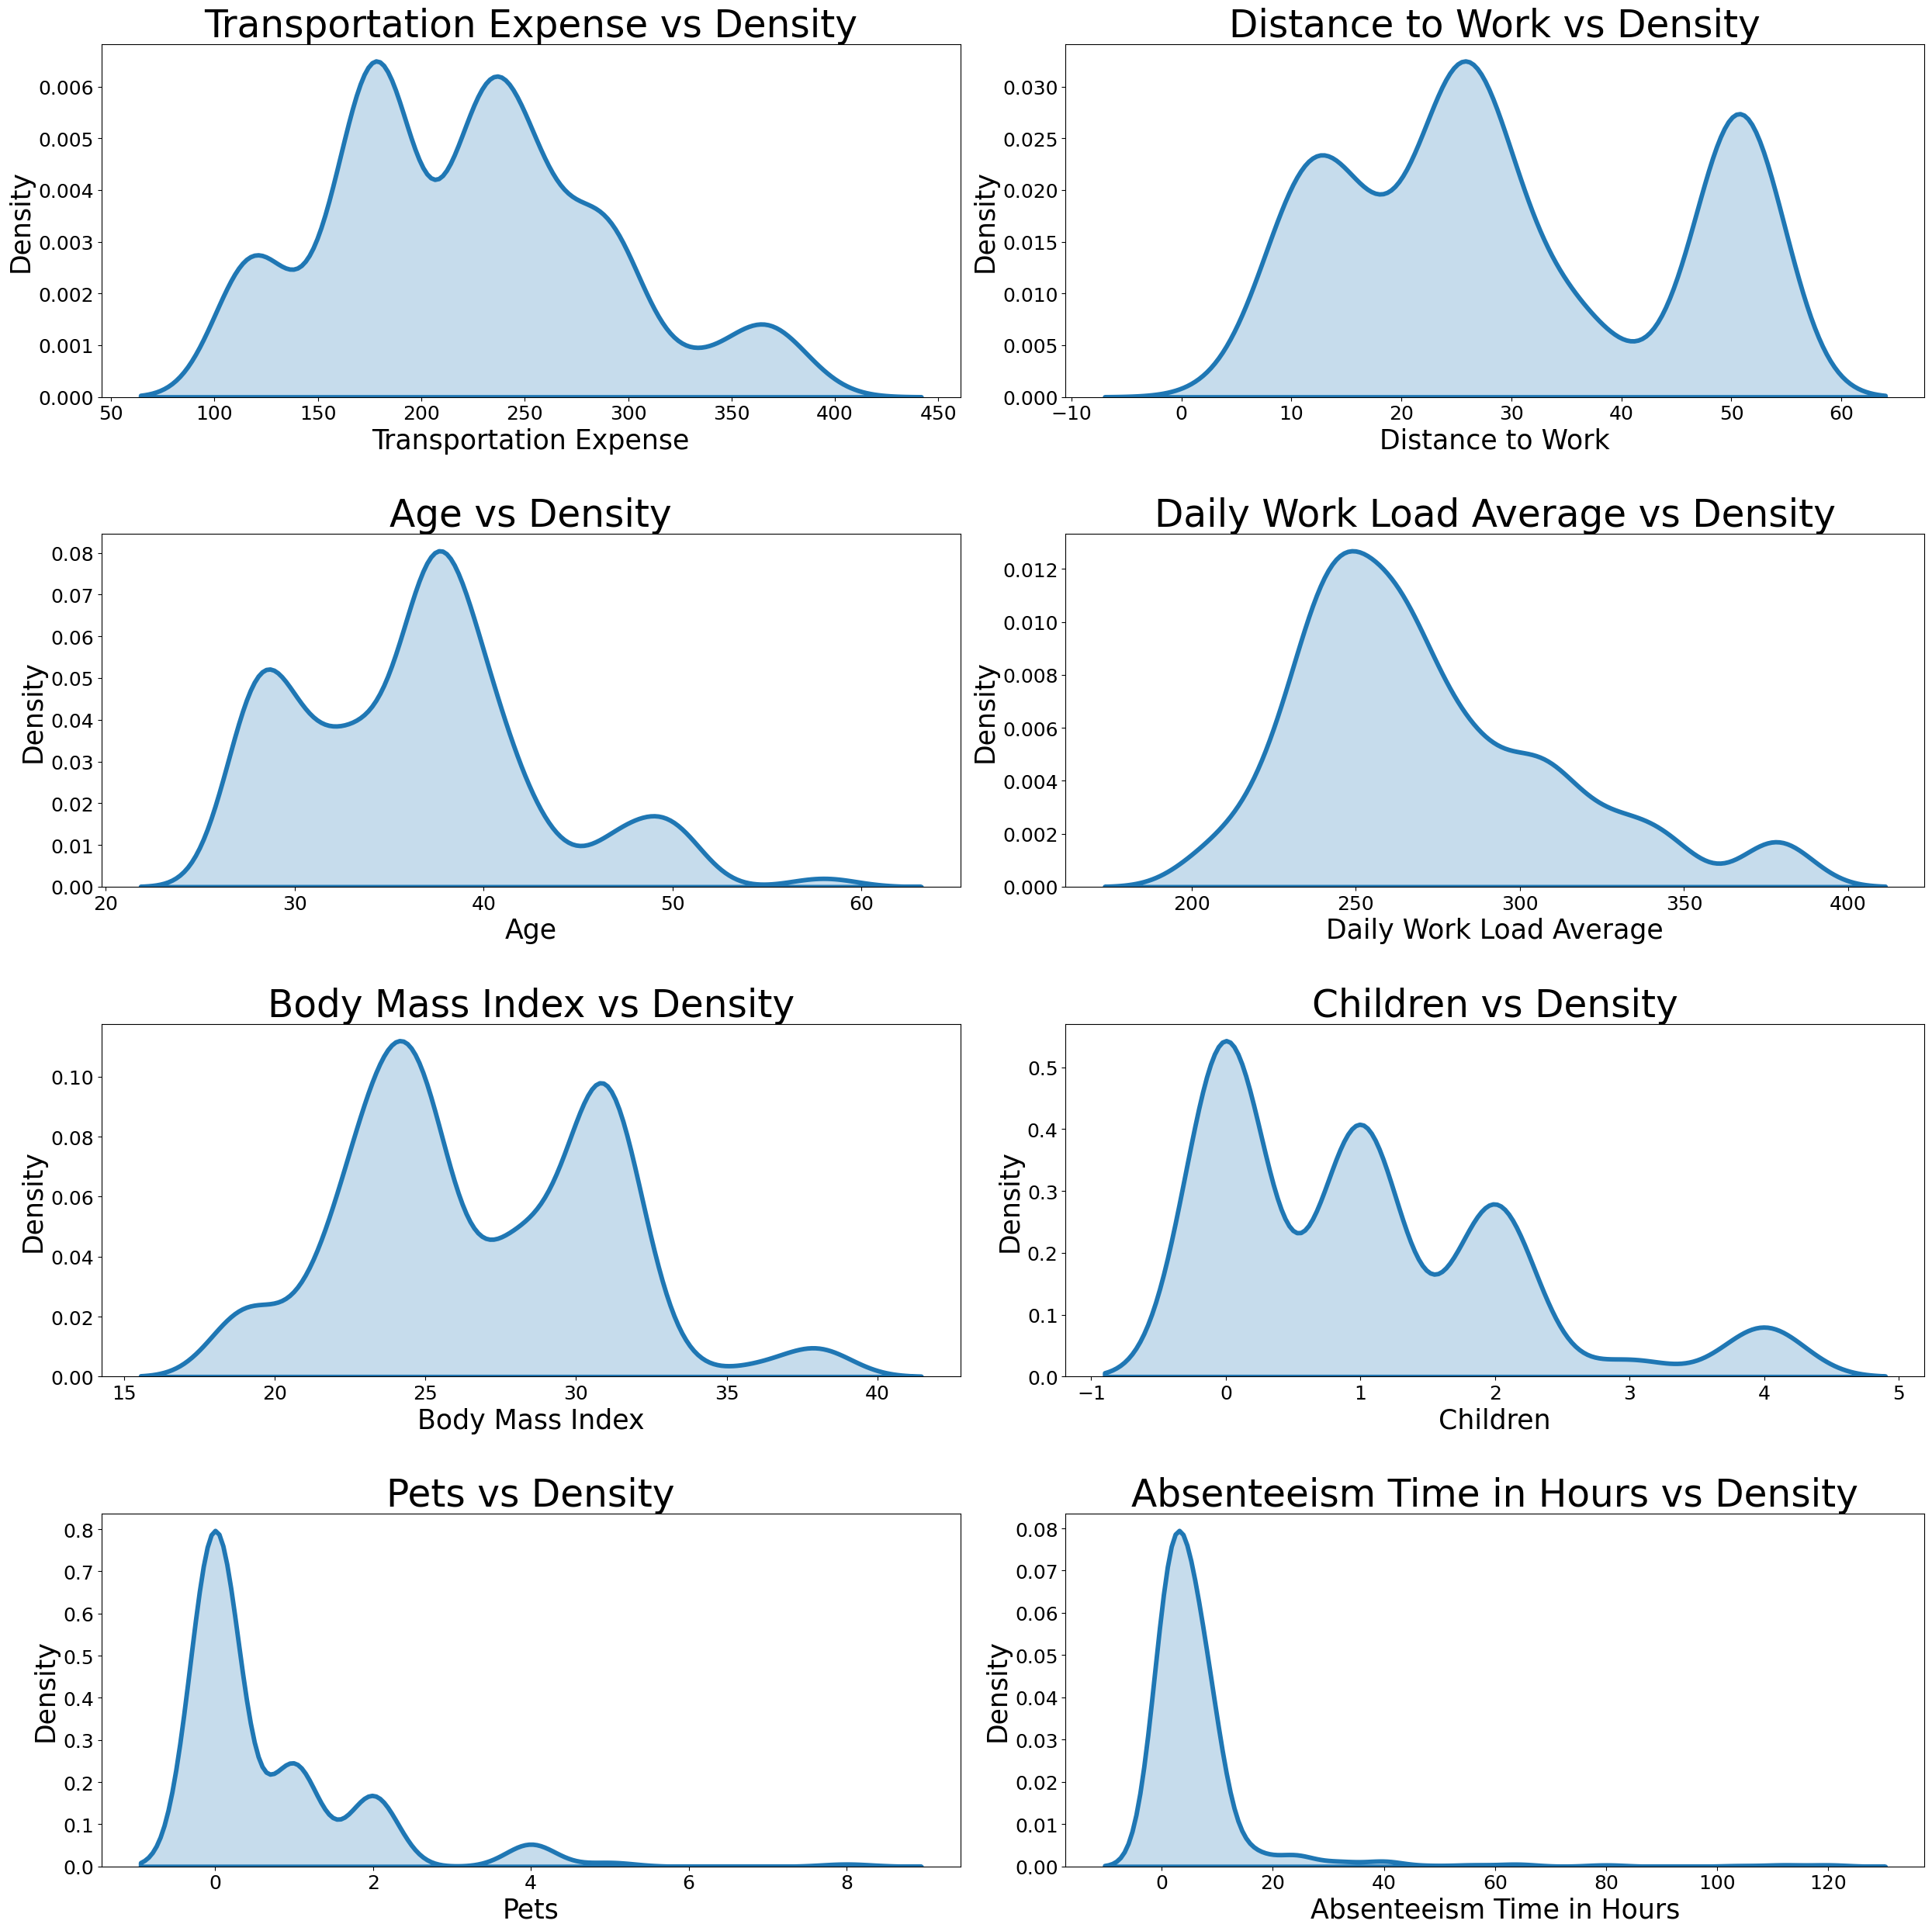

In [16]:
plt.figure(figsize=(25,25))
a = 1
for i in numeric_list:
    plt.subplot(4,2,a)
    plt.title(i + " vs Density",fontsize=35)
    curr_plot1 = sns.kdeplot(df[i],shade=True, linewidth=4.2) #curr_plot1 is taken as a variable to gain fine control over font size of graphs shown in below lines
    curr_plot1.set_xlabel(i,fontsize=25)
    curr_plot1.set_ylabel("Density",fontsize=25)
    curr_plot1.tick_params(labelsize=18)
    a+=1
    plt.tight_layout(h_pad=4)

### Box plot

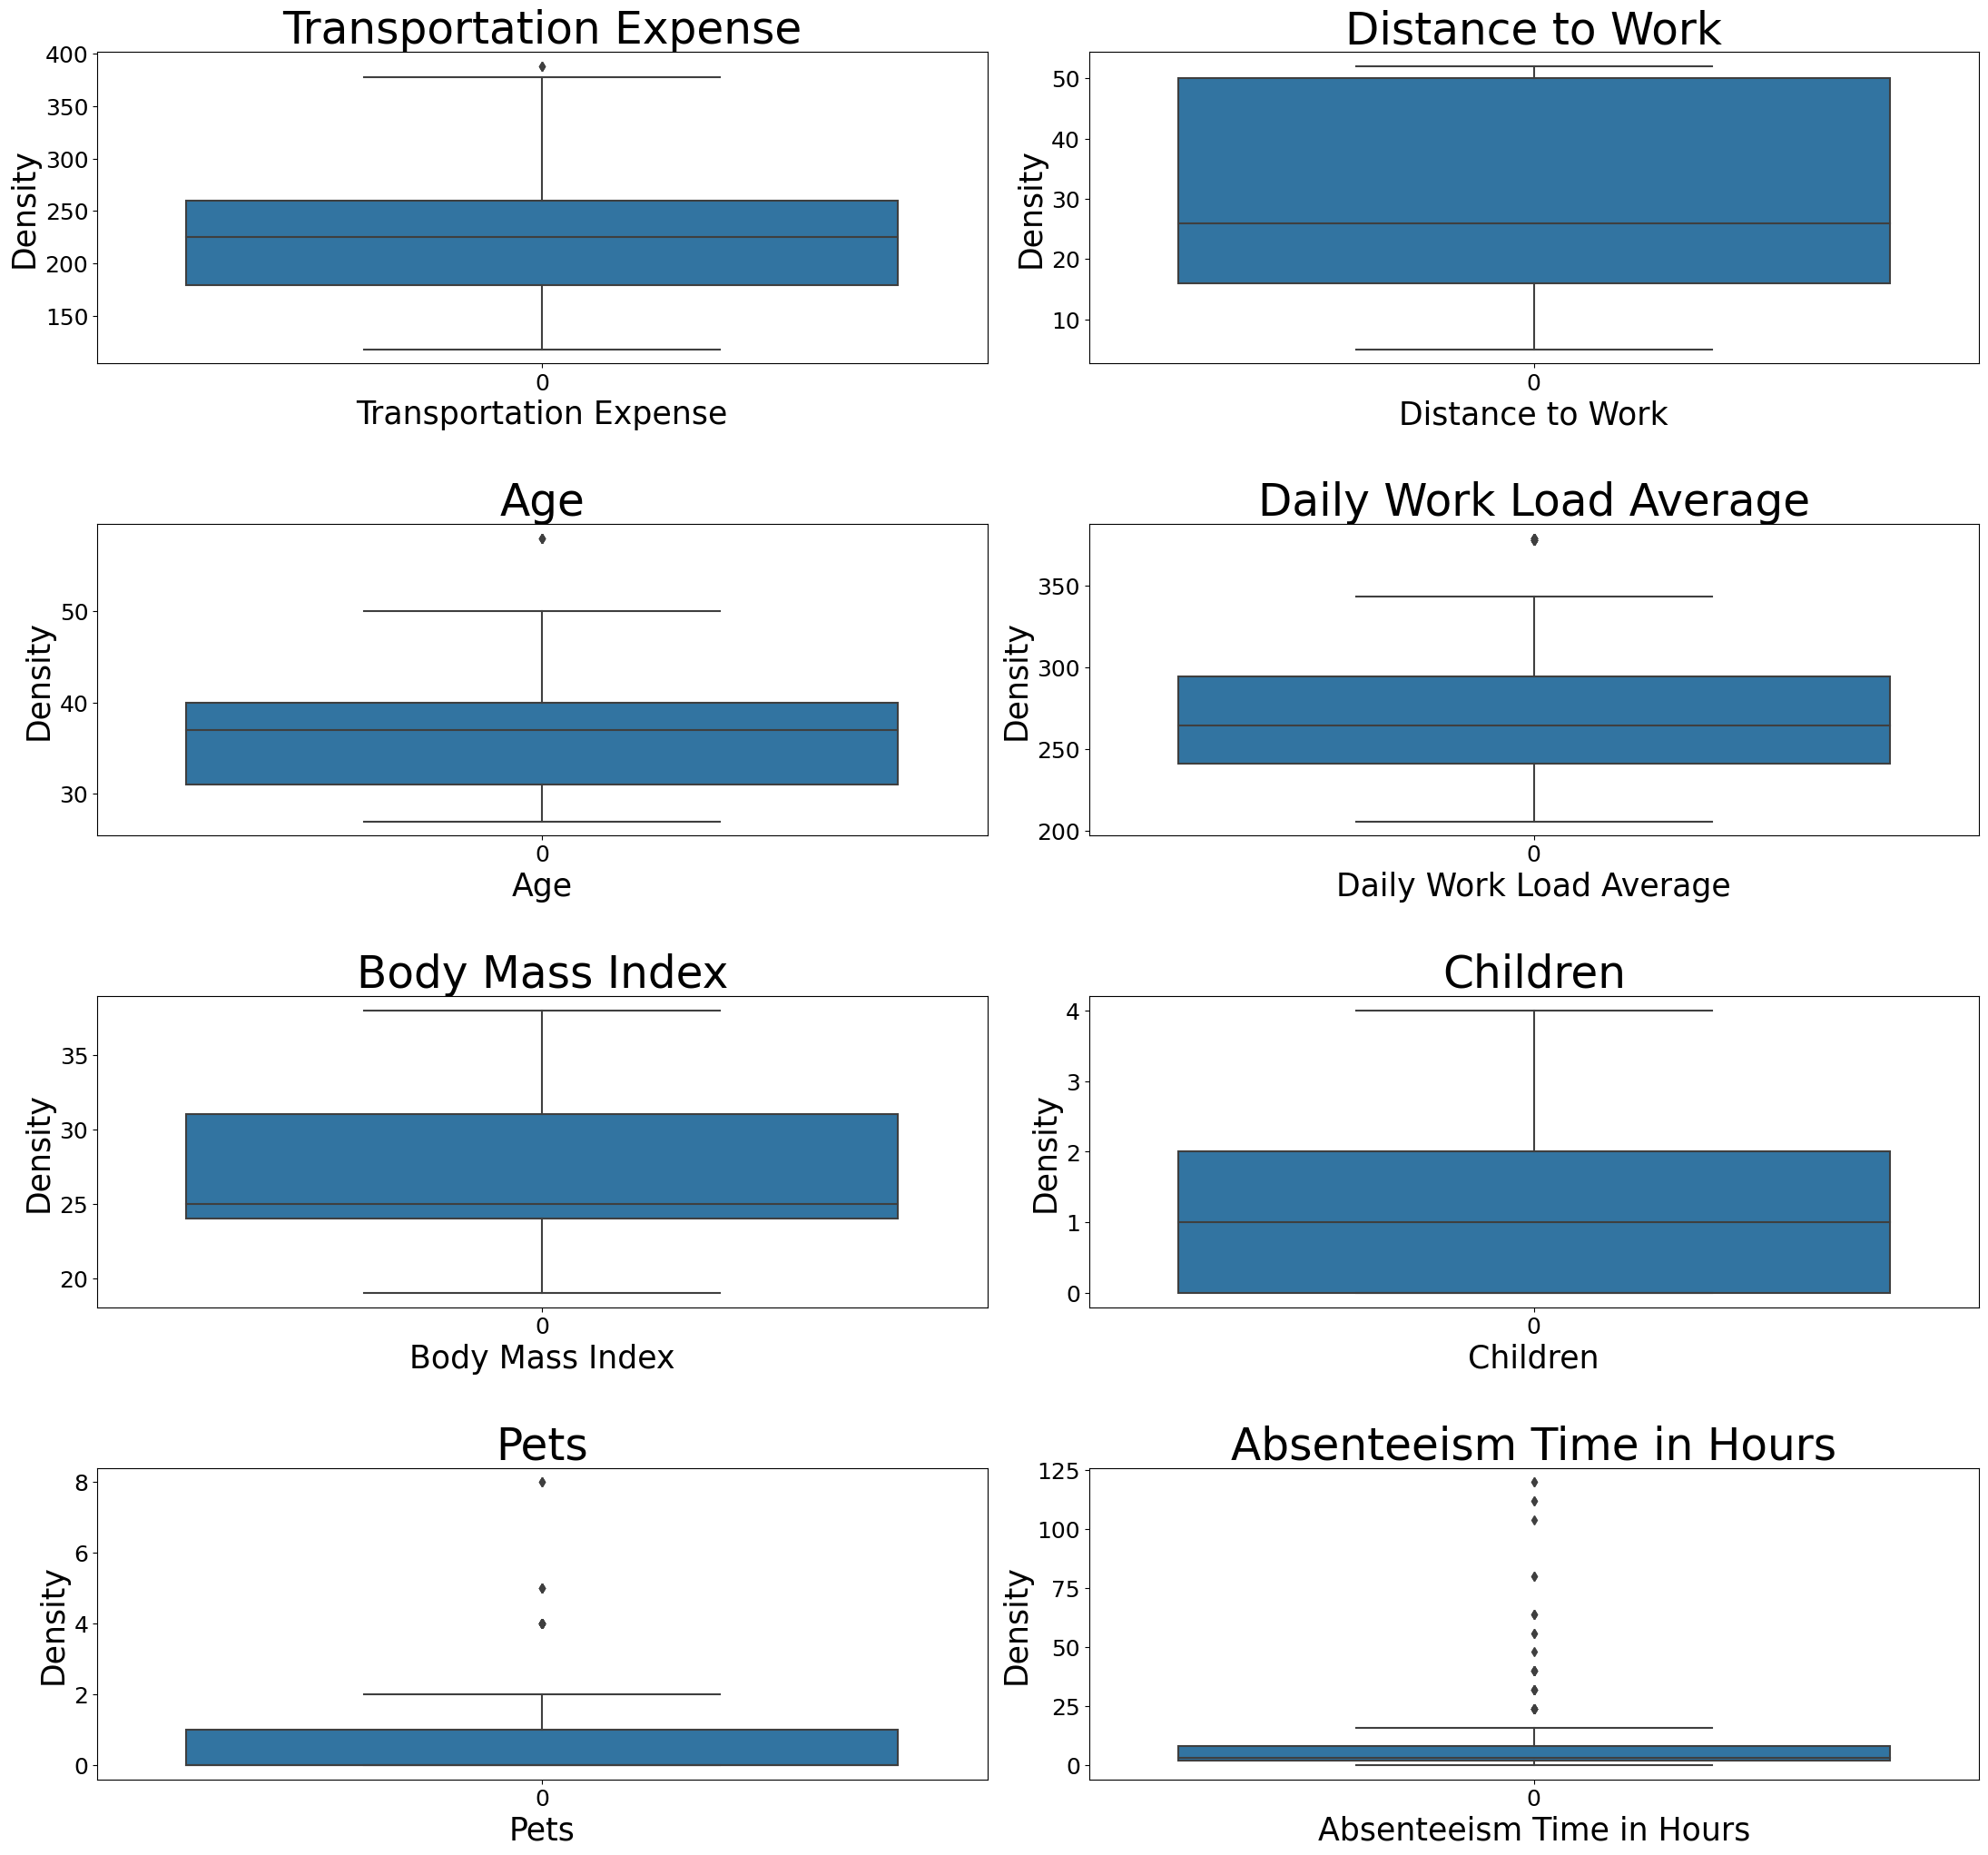

In [17]:
plt.figure(figsize=(22,25))
a = 1
for i in numeric_list:
    plt.subplot(5,2,a)
    plt.title(i,fontsize=35)
    curr_plot2 = sns.boxplot(data=df[i])
    curr_plot2.set_xlabel(i,fontsize=25)
    curr_plot2.set_ylabel("Density",fontsize=25)
    curr_plot2.tick_params(labelsize=18)
    a+=1
    plt.tight_layout(h_pad=4)

### Data Correlation using Heatmap

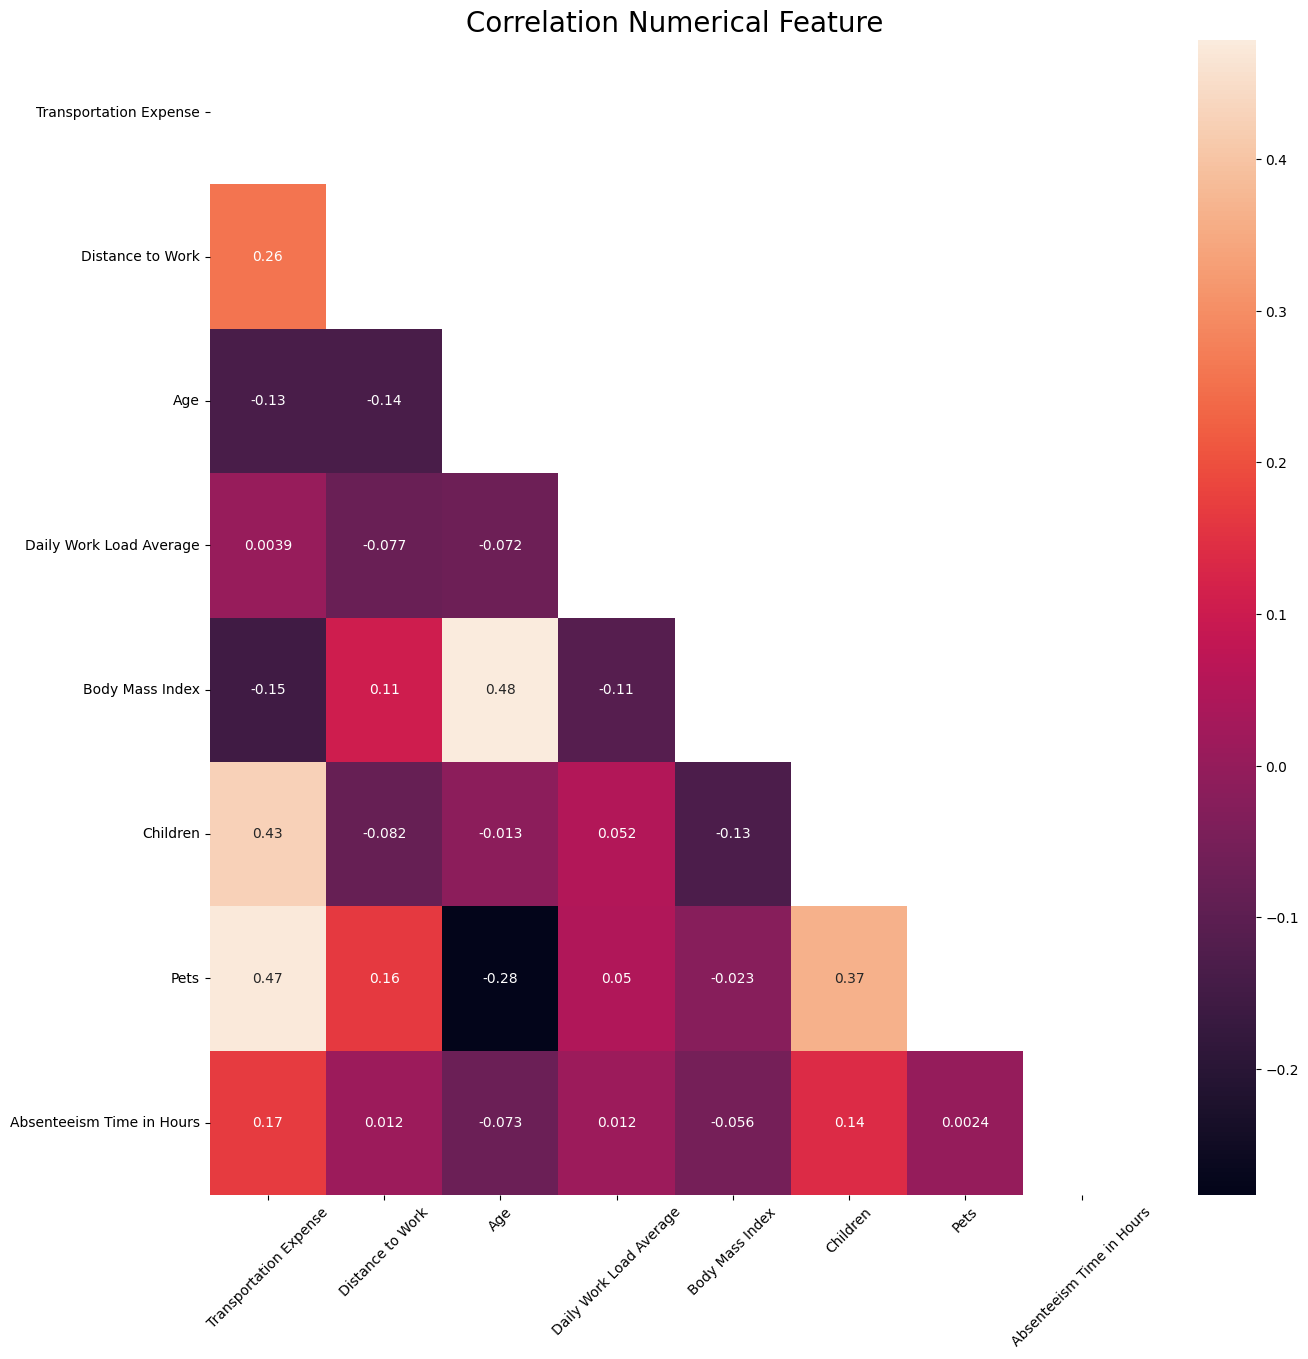

In [18]:
plt.figure(figsize=(15,15))
#Masking
mask = np.triu(np.ones_like(df[numeric_list].corr()))
sns.heatmap(df[numeric_list].corr("spearman"),annot=True,mask=mask)
plt.title("Correlation Numerical Feature",fontsize=20)
plt.tick_params(labelsize=10,rotation=0)
plt.xticks(rotation=45)
plt.show()

# Preprocessing

### Dummy variable creation [.get_dummies()]

In [19]:
reason_columns = pd.get_dummies(df['Reason for Absence'])
reason_columns # Dummy container for Reason for dummies for reason of absence.

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
reason_columns['check'] =  reason_columns.sum(axis=1)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
reason_columns['check'].sum(axis = 0)

700

In [22]:
reason_columns['check'].unique()

array([1])

In [23]:
reason_columns = reason_columns.drop(['check'], axis =1)

In [24]:
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True)

In [26]:
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Group the Reasons for Absence:

In [27]:
df.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'], dtype=object)

In [28]:
reason_columns.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28])

In [29]:
df = df.drop(['Reason for Absence'], axis = 1)

In [30]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [31]:
reason_columns.loc[:, 1:14].max(axis =1)

0      0
1      0
2      0
3      1
4      0
      ..
695    1
696    1
697    1
698    0
699    0
Length: 700, dtype: uint8

In [32]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis = 1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis = 1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis = 1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis = 1)

## Merging Reason Column Values with original df

In [33]:
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [34]:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)

In [35]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


#### Change columns names

In [36]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [37]:
columns_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'reason_1', 'reason_2', 'reason_3', 'reason_4']

In [38]:
df.columns = columns_names

In [39]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_1,reason_2,reason_3,reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


### Reorder Columns

In [40]:
columns_reordered = ['reason_1', 'reason_2', 'reason_3', 'reason_4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [41]:
df = df[columns_reordered]

In [42]:
df.head()

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


## Creating a checkpoint

In [43]:
df_reason = df.copy()

In [44]:
df_reason.head()

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


#### Date

In [45]:
type(df_reason['Date'][0])

str

In [46]:
df_reason['Date'] = pd.to_datetime(df_reason['Date'])#,infer_datetime_format=False) #, format= '%d/%m/%y')

/tmp/ipykernel_12481/1810878604.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_reason['Date'] = pd.to_datetime(df_reason['Date'])#,infer_datetime_format=False) #, format= '%d/%m/%y')


In [47]:
df_reason['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
         ...    
695   2018-05-23
696   2018-05-23
697   2018-05-24
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]

In [48]:
df_reason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   reason_1                   700 non-null    uint8         
 1   reason_2                   700 non-null    uint8         
 2   reason_3                   700 non-null    uint8         
 3   reason_4                   700 non-null    uint8         
 4   Date                       700 non-null    datetime64[ns]
 5   Transportation Expense     700 non-null    int64         
 6   Distance to Work           700 non-null    int64         
 7   Age                        700 non-null    int64         
 8   Daily Work Load Average    700 non-null    float64       
 9   Body Mass Index            700 non-null    int64         
 10  Education                  700 non-null    int64         
 11  Children                   700 non-null    int64         
 12  Pets    

## Extract the Month Value:

In [49]:
df_reason['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [50]:
df_reason['Date'][0].month

7

In [51]:
list_months = []
list_months

[]

In [52]:
for i in range(700):
    list_months.append(df_reason['Date'][i].month)

In [53]:
print(list_months)

[7, 7, 7, 7, 7, 10, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 12, 3, 10, 8, 8, 8, 4, 12, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 1, 7, 1, 8, 9, 9, 9, 9, 4, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 11, 9, 9, 6, 10, 10, 10, 10, 10, 6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 4, 5, 12, 11, 2, 9, 11, 11, 11, 11, 11, 11, 11, 2, 10, 11, 11, 1, 1, 2, 2, 3, 4, 8, 9, 10, 11, 12, 12, 11, 12, 12, 6, 4, 5, 5, 6, 7, 7, 8, 11, 12, 12, 1, 1, 1, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 5, 3, 10, 11, 11, 12, 12, 8, 9, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 8, 3, 3, 2, 3, 4, 4, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 4, 12, 4, 4, 4, 4, 6, 7, 8, 8, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 5, 2, 3, 3, 11, 9, 10, 4, 11, 5, 5, 5, 5, 11, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 7, 8, 9, 10, 6, 6, 5, 6, 8, 8, 12, 7, 7, 7, 7, 7, 7, 7, 7, 11, 7, 7, 4, 11, 7, 8, 10, 10, 11, 8, 9, 10, 10, 10, 8, 8, 8, 8, 8, 8, 5, 9, 7, 8, 12, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 6, 6, 6, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10

In [54]:
len(list_months)

700

In [55]:
df_reason['Month_value'] = list_months

In [56]:
df_reason.head(20)

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_value
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7
5,0,0,0,1,2015-10-07,179,51,38,239.554,31,1,0,0,2,10
6,0,0,0,1,2015-07-17,361,52,28,239.554,27,1,1,4,8,7
7,0,0,0,1,2015-07-24,260,50,36,239.554,23,1,4,0,4,7
8,0,0,1,0,2015-06-07,155,12,34,239.554,25,1,2,0,40,6
9,0,0,0,1,2015-07-13,235,11,37,239.554,29,3,1,1,8,7


## Extract the Day of the Week

In [57]:
df_reason['Date'][699].weekday()

3

In [58]:
df_reason['Date'][699]

Timestamp('2018-05-31 00:00:00')

In [59]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [60]:
df_reason['Day of the Week'] = df_reason['Date'].apply(date_to_weekday)

In [61]:
df_reason.head()

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_value,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [62]:
df_reason_date = df_reason.copy()
df_reason_date

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_value,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2018-05-23,179,22,40,237.656,22,2,2,0,8,5,2
696,1,0,0,0,2018-05-23,225,26,28,237.656,24,1,1,2,3,5,2
697,1,0,0,0,2018-05-24,330,16,28,237.656,25,2,0,0,8,5,3
698,0,0,0,1,2018-05-24,235,16,32,237.656,25,3,0,0,2,5,3


## Modify 'Education' column

In [63]:
df_reason_date.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Date',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month_value',
       'Day of the Week'], dtype=object)

In [64]:
columns_reord = ['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Month_value',
       'Day of the Week', 'Date','Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours'] 

In [65]:
df_reason_date = df_reason_date[columns_reord]

In [66]:
df_reason_date = df_reason_date.drop(['Date'],axis = 1)

In [67]:
df_reason_date.head()

,reason_1,reason_2,reason_3,reason_4,Month_value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


In [68]:
# Education : Representing different levels of education
#      1.	High School
#      2.	Graduate
#      3.	Post Graduate
#      4.	Master / Doctor
df_reason_date['Education'].unique()

array([1, 3, 2, 4])

In [69]:
df_reason_date['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

Text(0, 0.5, 'Number of Candidates')

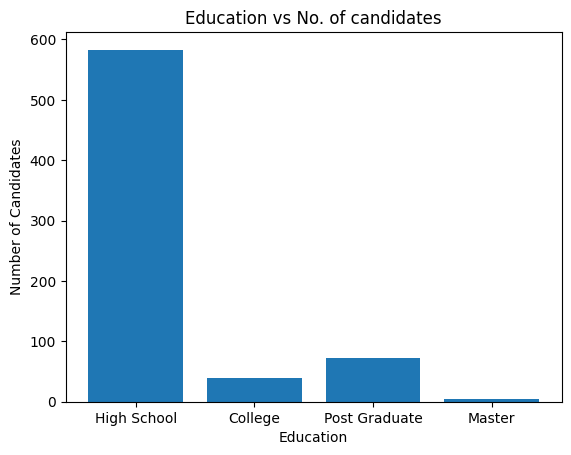

In [70]:
#Education vs No. of candidates
a = dict(df_reason_date['Education'].value_counts())  #using 'a' variable to store dict of value_counts() otherwise it was returned as rich text (with-spaces) 
plt.bar(a.keys(),a.values())  #,color=['black', 'red', 'green', 'blue']
plt.xticks(np.arange(1, 5, 1),["High School","College","Post Graduate","Master"])
plt.title("Education vs No. of candidates")
plt.xlabel("Education")
plt.ylabel("Number of Candidates")

#    OR WE CAN ALSO USE-
# df_reason_date['Education'].value_counts().plot(kind='bar')
# plt.xticks(np.arange(0, 5, 1),["High School","College","PG","Master","4"])


In [71]:
df_reason_date['Education'] = df_reason_date['Education'].map({1:0, 2:1, 3:1, 4:1})

In [72]:
df_reason_date['Education'].unique()

array([0, 1])

In [73]:
df_reason_date['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

### Final Checkpoint

In [74]:
df_preprocessed = df_reason_date.copy()
df_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month_value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [75]:
# My goal was clean so that was covered in preprocessing. You can save the file with uncommenting the below line
# df_preprocessed.to_csv('Absenteeism_preprocessed.csv', index = False)

# Modelling

### Using logistic regression to predict absenteesim

In [76]:
# data_preprocessed = pd.read_csv('Absenteeism_preprocessed.csv')
data_preprocessed = df_preprocessed.reset_index(drop=True)

### Check the Preprocessed data

In [77]:
data_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month_value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


## Creating the target variable
#### 1. We will take median-value of the 'Absenteeism time in hours' and use it as a cut-off line
#### 2. Everything below median is normal and Everything above the median is excessive

In [77]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [78]:
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > 
                   data_preprocessed['Absenteeism Time in Hours'].median(), 1 , 0)

In [79]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [80]:
data_preprocessed['Excessive Absenteeism'] = targets

In [81]:
data_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month_value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0
